<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [25]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\Avela\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

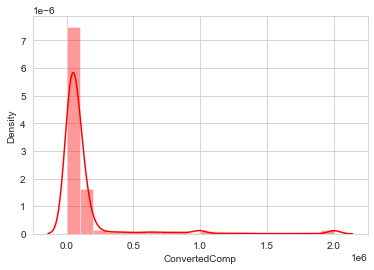

In [8]:
import seaborn as sns

sns.set_style('whitegrid')
sns.distplot(df['ConvertedComp'], color ='red', bins = 20)

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

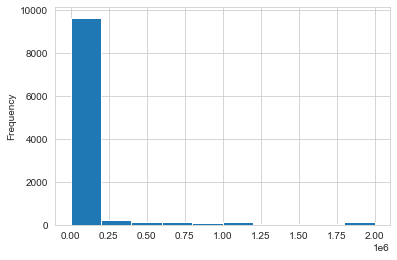

In [5]:
df['ConvertedComp'].plot.hist()

What is the median of the column `ConvertedComp`?


In [9]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [10]:
df['Gender'].eq('Man').sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
dfw = df[df['Gender'].eq('Woman') == True]
dfw['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


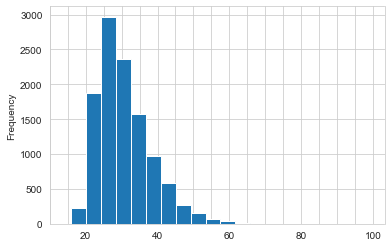

In [43]:
ax = df['Age'].plot.hist(bins=20)
xtick = np.arange(10,100, 5)
ax.set_xticks( xtick, minor=True )
ax.grid('on', which='both', axis='x' )

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

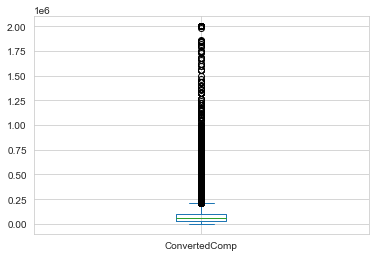

In [44]:
df['ConvertedComp'].plot.box()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [48]:
lower_q = df['ConvertedComp'].quantile(0.25)
upper_q = df['ConvertedComp'].quantile(0.75)
IQR = upper_q - lower_q
print('The Inter Quartile Range goes from ', lower_q, 'to', upper_q, 'the IQR equals to', IQR)

The Inter Quartile Range goes from  26868.0 to 100000.0 the IQR equals to 73132.0


Find out the upper and lower bounds.


In [50]:
upper_b = df['ConvertedComp'].max()
lower_b = df['ConvertedComp'].min()
print('The lower bound is:', lower_b, ', the upper bound is:', upper_b)

The lower bound is: 0.0 , the upper bound is: 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [56]:
outliers = df[(df.ConvertedComp > (upper_q + 1.5*IQR))].shape[0]
print('There are', outliers, 'outliers.')

There are 879 outliers.


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [66]:
no_outliers_df = df[(df.ConvertedComp < (upper_q + 1.5*IQR))]
no_outliers = no_outliers_df.shape[0]
print('There were', df.shape[0], 'respondents, removing the outliers, now we have a dataframe with', no_outliers, 'respondents.')

There were 11398 respondents, removing the outliers, now we have a dataframe with 9703 respondents.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [64]:
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
